**Introduction:** Commercial banks often receive numerous credit card applications, but not all applicants are approved. Many applications are rejected due to reasons such as high loan balances, low income levels, or too many inquiries on an individual's credit report. Manually reviewing these applications is tedious, error-prone, and time-consuming. However, with the help of machine learning, this process can be automated. We'll create a tool that predicts whether a credit card application will be approved or rejected based on various factors, similar to what real banks do.

Why is your proposal important in today’s world? How predicting a good client is worthy for a bank? and How is it going to impact the banking sector?

In today's world, where commercial banks are flooded with credit card applications, using machine learning to predict good clients is crucial. By analyzing factors like income, existing debts, and credit history, we can identify applicants likely to repay their debts. This is valuable for banks because it helps them minimize losses from defaults, offer better terms to reliable customers, and streamline their approval process for faster service. Ultimately, predicting good clients helps banks manage risks and provide better service in a competitive market. This boosts the economy of a country.

If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India?

To address this gap and ensure the proposed method's effectiveness in an Indian banking context, further research and collaboration with domain experts, regulatory authorities, and banking professionals in India are essential. Additionally, collecting and analyzing relevant data specific to the Indian market, including socioeconomic factors, customer demographics, and local credit scoring practices, can enhance the accuracy and applicability of the predictive model.


Type of Income Hypothesis:

•	Null Hypothesis (H0): The type of income has no effect on credit card approval.

•	Alternate Hypothesis (H1): The type of income significantly influences credit card approval.

Education Level Hypothesis:

•	Null Hypothesis (H0): There is no association between education level and credit card approval.

•	Alternate Hypothesis (H1): Individuals with higher education levels have a significantly higher likelihood of credit card approval.

Annual Income Hypothesis:
•	Null Hypothesis (H0): There is no significant difference in the mean annual income between approved and rejected credit card applications.

•	Alternate Hypothesis (H1): The mean annual income is significantly higher for approved credit card applications compared to rejected ones.

Employment Status Hypothesis:

•	Null Hypothesis (H0): Employment status does not affect credit card approval.

•	Alternate Hypothesis (H1): Employed individuals are significantly more likely to have their credit card applications approved.

In [ ]:
#Importing necessarry libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading the data set
df=pd.read_csv("Credit_card.csv")
df1=pd.read_csv("Credit_card_label.csv")
#merging the data set
df2=pd.merge(df,df1,on="Ind_ID")

Data exploration and understanding

In [ ]:
df2.head(6)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
# renaming the column names
df2 = df2.rename(columns={'Ind_ID':'Ind_id', 'GENDER': 'Gender', 'CHILDREN': 'Children', 'EDUCATION': 'Education', 'EMAIL_ID':'Email_id','Birthday_count': 'Age','Employed_days':'Employed_exp'})

In [ ]:
df2.head(4)


,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
df2.describe() #Find the mean, min, max, and std deviation

,Ind_id,Children,Annual_income,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


Handling the missing values,We have used isnull().sum() to summarize the total number of missing values per column.



In [ ]:
# find out the null values
df2.isnull().sum()

Ind_id               0
Gender               7
Car_Owner            0
Propert_Owner        0
Children             0
Annual_income       23
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Age                 22
Employed_exp         0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_id             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

Knowing the Data
To understand our data better, we use handy pandas features df.info() and df.describe(). Let’s first print the information of the dataset by using df.info().

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_id           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1526 non-null   float64
 11  Employed_exp     1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_id         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

<Axes: >

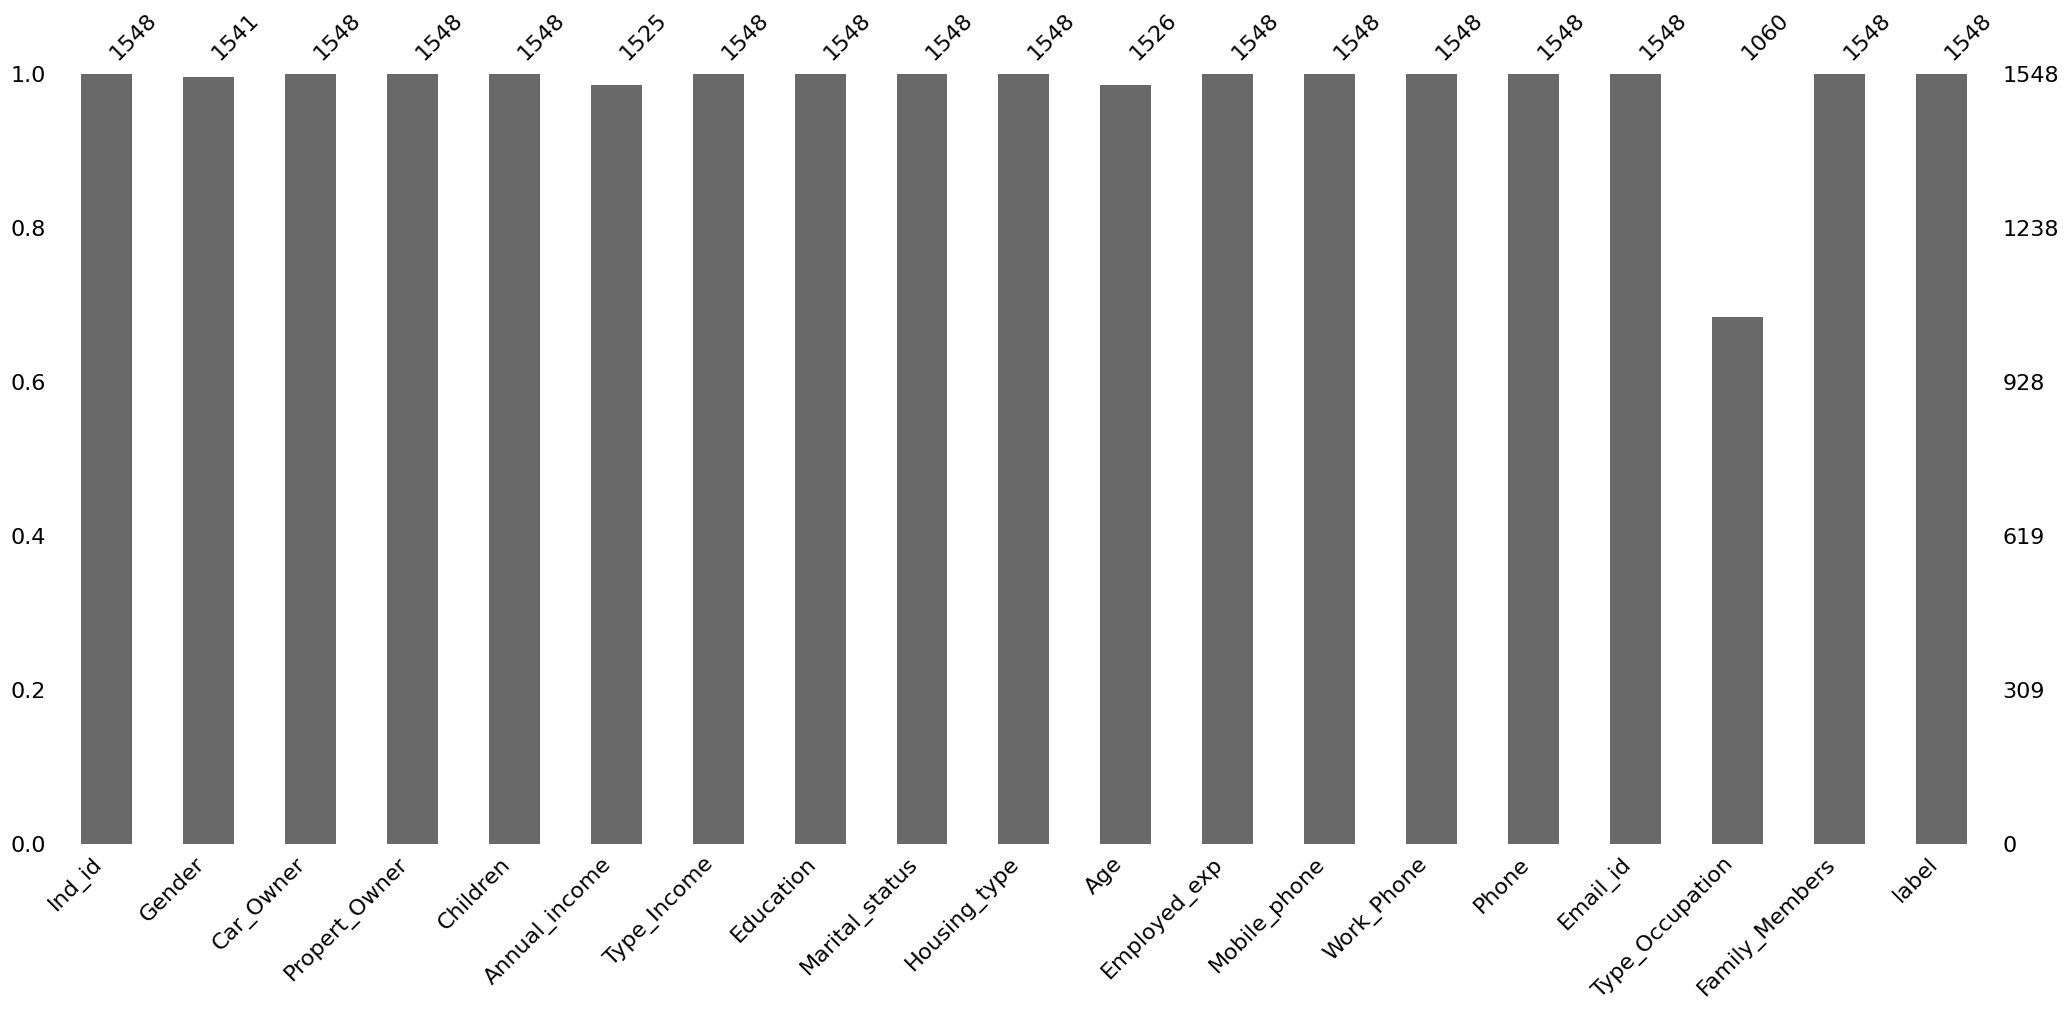

In [ ]:
# exploratory the missing values
import missingno as msno
msno.bar(df2)

<Axes: >

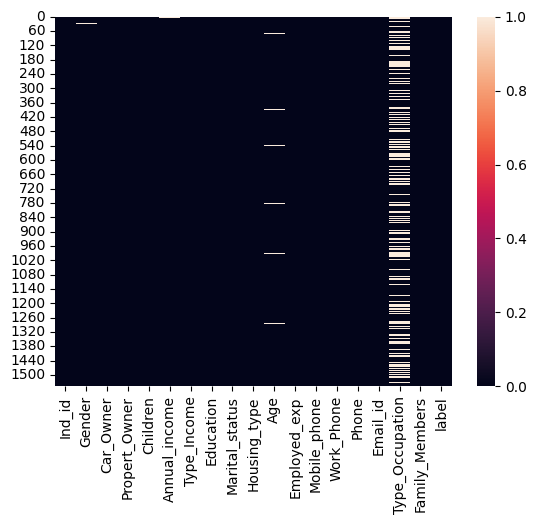

In [ ]:
# visualising the missing values
sns.heatmap(df2.isnull())

In [ ]:
# Imputing the null values with mean values
df2.fillna(df2.mean(), inplace=True)

In [ ]:
# finding the null values.
df2.isnull().sum()

Ind_id               0
Gender               7
Car_Owner            0
Propert_Owner        0
Children             0
Annual_income        0
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Age                  0
Employed_exp         0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_id             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
# replace missing values
df2['Type_Occupation'].fillna('other',inplace=True)

In [ ]:
# Deleting the null values in the Gender column
df2=df2.dropna(subset=["Gender"])

In [ ]:
df2.head(6)

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
6,5009754,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1


In [ ]:
# finding the null values.(rechecking)
df2.isnull().sum()

Ind_id             0
Gender             0
Car_Owner          0
Propert_Owner      0
Children           0
Annual_income      0
Type_Income        0
Education          0
Marital_status     0
Housing_type       0
Age                0
Employed_exp       0
Mobile_phone       0
Work_Phone         0
Phone              0
Email_id           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

 For missing values in the numerical columns, we replaced them with the mean of non-missing values in that column. Now the dataset contains no missing values.

In [ ]:
# count the rows and columns
df2.shape

(1541, 19)

In [ ]:
# converting the negative values to actual age
df2['Age']=abs(round((df2['Age']/-365),0))
# converting negative values to exprience of the employee
df2['Employed_exp']=abs(round((df2['Employed_exp']/-365),0))

In [ ]:
# replacing the extreme values with zero.
df2['Employed_exp'].replace(1001.0, 0,inplace=True)

In [ ]:
df2.head(5)

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,44.0,2.0,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1


In [ ]:
dff = df2.copy()
dff.to_csv('ML_project.csv', index=False)

In [ ]:
dff.head(2)

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1


Finding the relationship between each variables

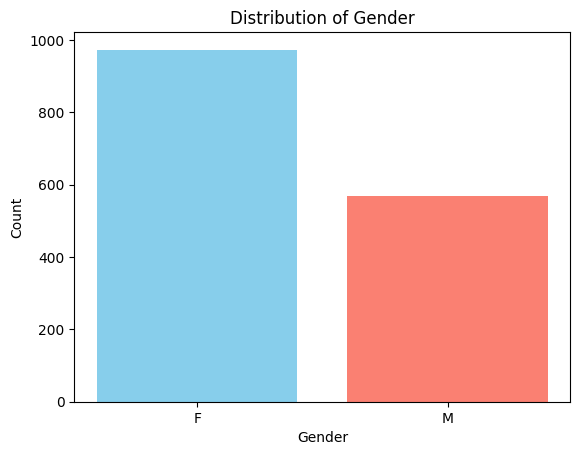

In [ ]:
# Count number of males and females
gender_count = df2['Gender'].value_counts()

# Create bar plot with custom color
plt.bar(gender_count.index, gender_count.values, color=['skyblue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

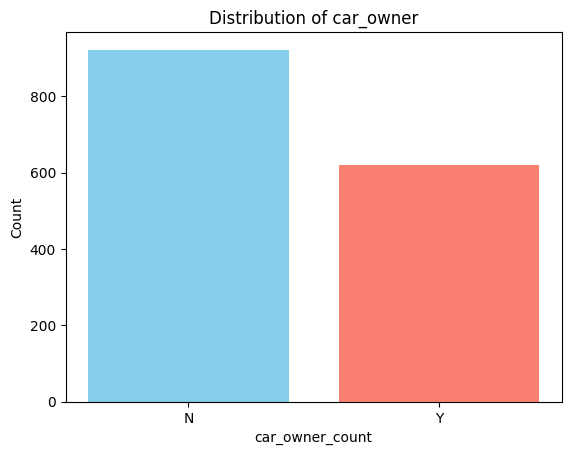

In [ ]:
# count number of car owner
car_owner_count=df2['Car_Owner'].value_counts()
plt.bar(car_owner_count.index,car_owner_count.values,color=['skyblue', 'salmon'])
plt.xlabel('car_owner_count')
plt.ylabel('Count')
plt.title('Distribution of car_owner')
plt.show()

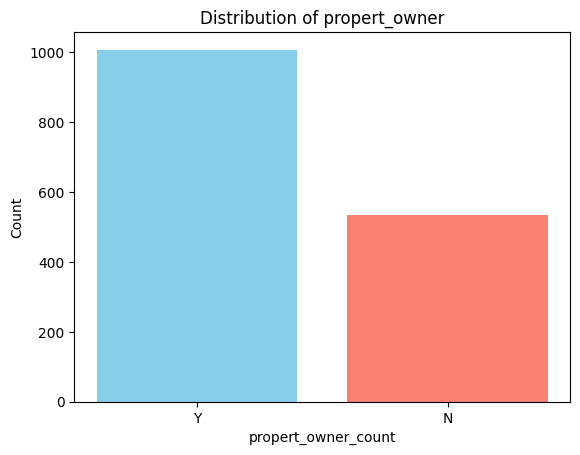

In [ ]:
# count number of propert_owner
propert_owner_count=df2['Propert_Owner'].value_counts()
plt.bar(propert_owner_count.index,propert_owner_count.values,color=['skyblue', 'salmon'])
plt.xlabel('propert_owner_count')
plt.ylabel('Count')
plt.title('Distribution of propert_owner')
plt.show()

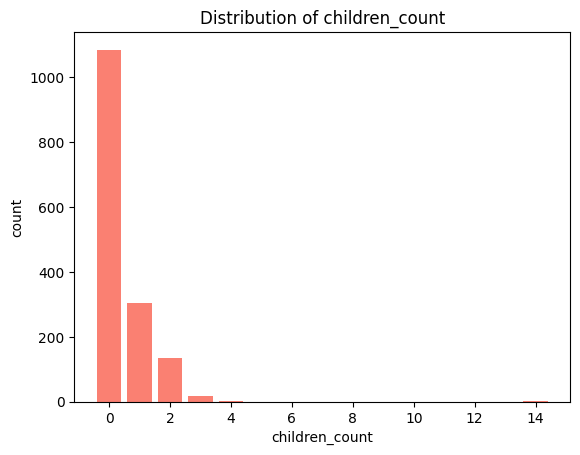

In [ ]:
# count number of children
children_count=df2['Children'].value_counts()
#creat barpolt using Matplotlib
plt.bar(children_count.index,children_count.values,color='salmon')
plt.xlabel('children_count')
plt.ylabel('count')
plt.title('Distribution of children_count')
plt.show()

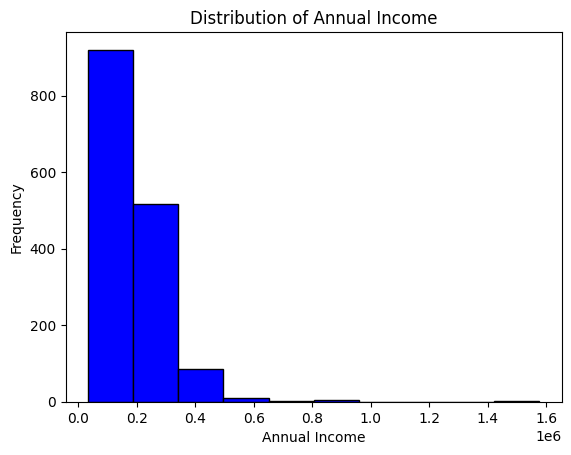

In [ ]:
# Plotting the distribution
plt.hist(df2['Annual_income'], bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

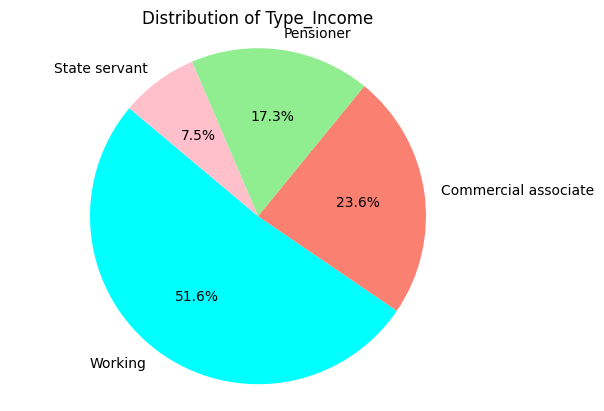

In [ ]:
# Count occurrences of each unique category
Type_Income_count = df2['Type_Income'].value_counts()

# Create pie chart
plt.pie(Type_Income_count, labels=Type_Income_count.index, autopct='%1.1f%%', startangle=140, colors=['cyan', 'salmon', 'lightgreen','pink'])
plt.title('Distribution of Type_Income')
plt.axis('equal')
plt.show()

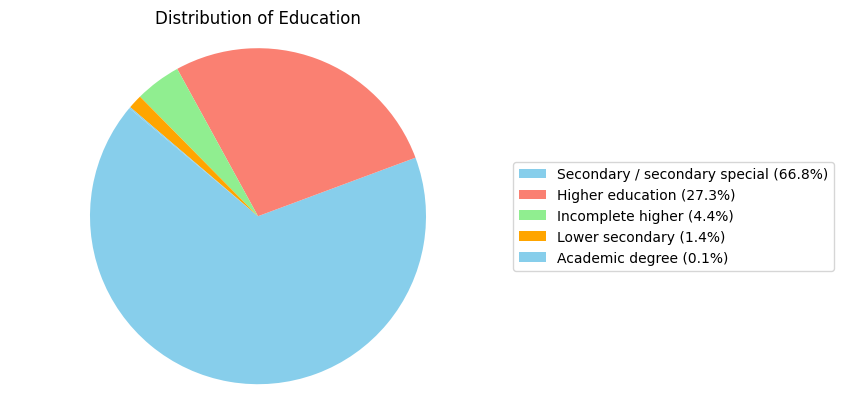

In [ ]:
# Count occurrences of each unique category in Education
education_count = df2['Education'].value_counts()
percentages = [(count / len(df2['Education'])) * 100 for count in education_count.values]
legend_labels = [f'{label} ({percent:.1f}%)' for label, percent in zip(education_count.index, percentages)]
plt.pie(education_count,  autopct='', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.axis('equal')
plt.legend(legend_labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Education')
plt.show()


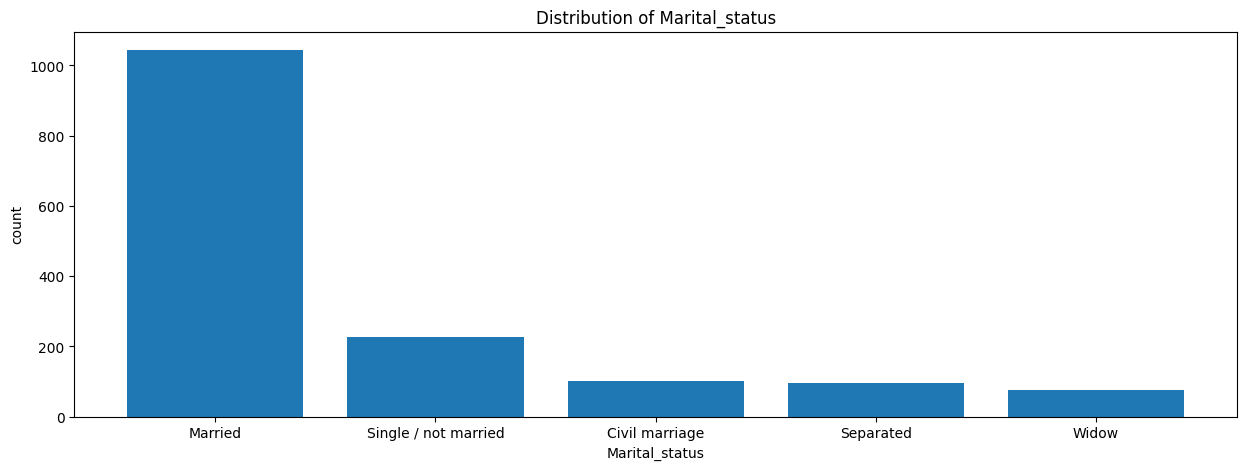

In [ ]:
# count number of Marital_status
Marital_status_count=df2['Marital_status'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(Marital_status_count.index,Marital_status_count.values)
plt.xlabel('Marital_status')
plt.ylabel('count')
plt.title('Distribution of Marital_status')
plt.show()

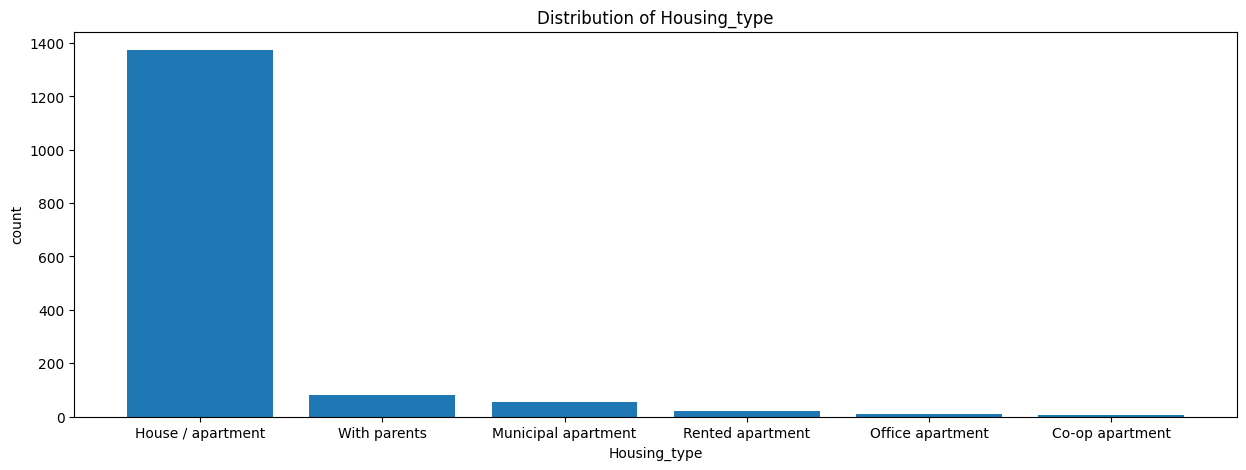

In [ ]:
# count number of Housing_type
Housing_type_count=df2['Housing_type'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Housing_type_count.index,Housing_type_count.values)
plt.xlabel('Housing_type')
plt.ylabel('count')
plt.title('Distribution of Housing_type')
plt.show()

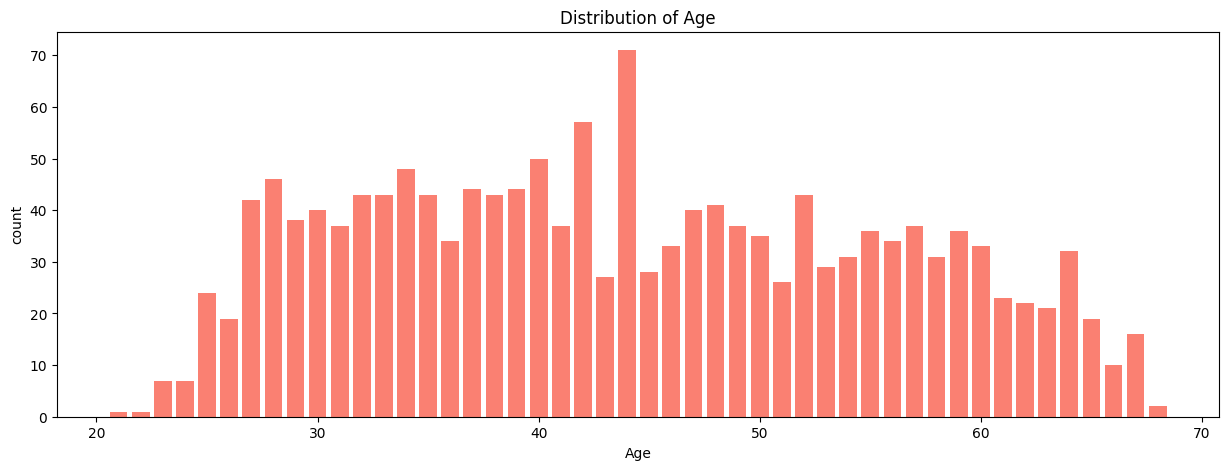

In [ ]:
# count number of Birthday_count
Birthday_count=df2['Age'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(Birthday_count.index,Birthday_count.values,color='salmon')
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Distribution of Age')
plt.show()

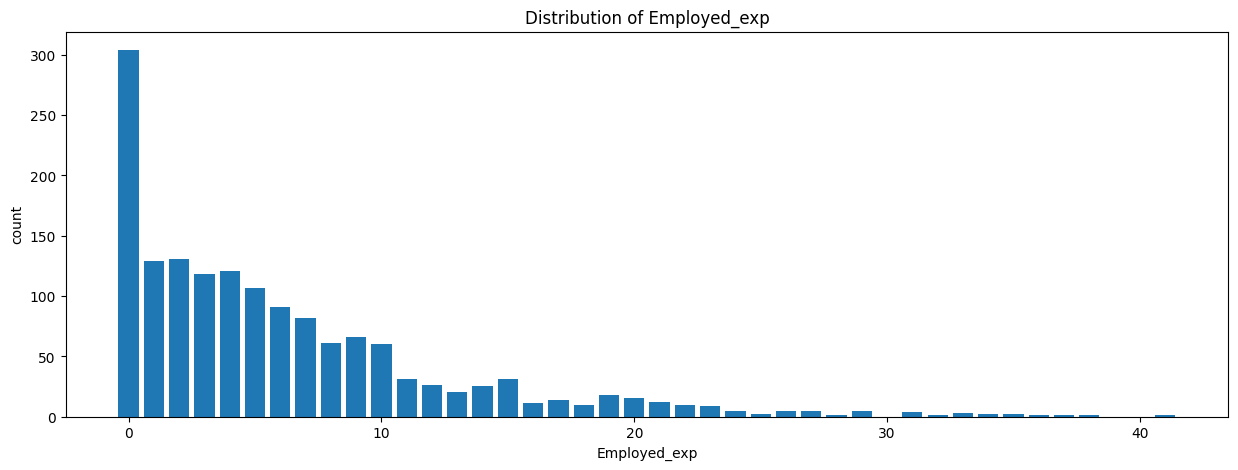

In [ ]:
# count number of Employed_days
Employed_days_count=df2['Employed_exp'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(Employed_days_count.index,Employed_days_count.values)
plt.xlabel('Employed_exp')
plt.ylabel('count')
plt.title('Distribution of Employed_exp')
plt.show()

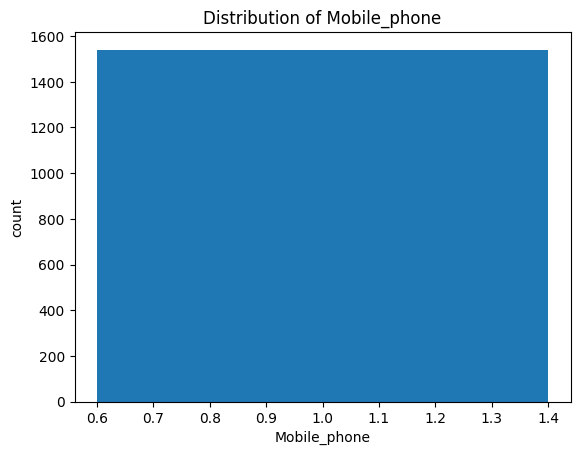

In [ ]:
# count number of Mobile_phone
Mobile_phone_count=df2['Mobile_phone'].value_counts()
plt.bar(Mobile_phone_count.index,Mobile_phone_count.values)
plt.xlabel('Mobile_phone')
plt.ylabel('count')
plt.title('Distribution of Mobile_phone')
plt.show()

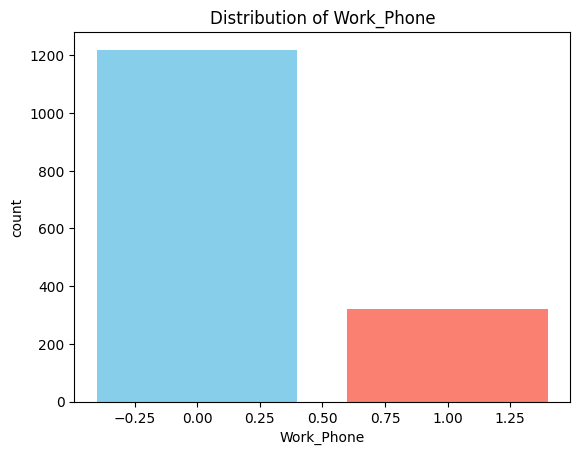

In [ ]:
# count number of Work_Phone
Work_Phone_count=df2['Work_Phone'].value_counts()
plt.bar(Work_Phone_count.index,Work_Phone_count.values,color=['skyblue', 'salmon'])
plt.xlabel('Work_Phone')
plt.ylabel('count')
plt.title('Distribution of Work_Phone')
plt.show()

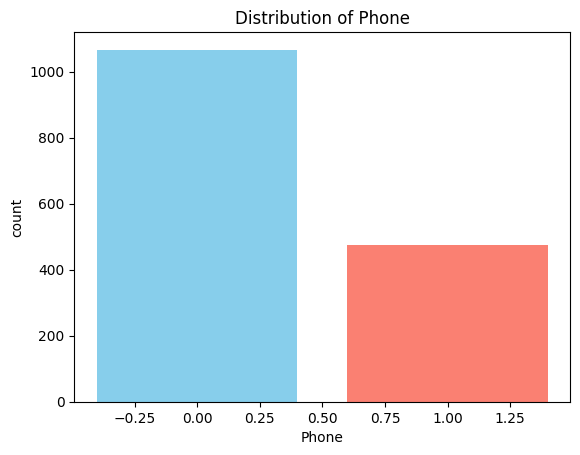

In [ ]:
# count number of Phone
Phone_count=df2['Phone'].value_counts()
plt.bar(Phone_count.index,Phone_count.values,color=['skyblue', 'salmon'])
plt.xlabel('Phone')
plt.ylabel('count')
plt.title('Distribution of Phone')
plt.show()

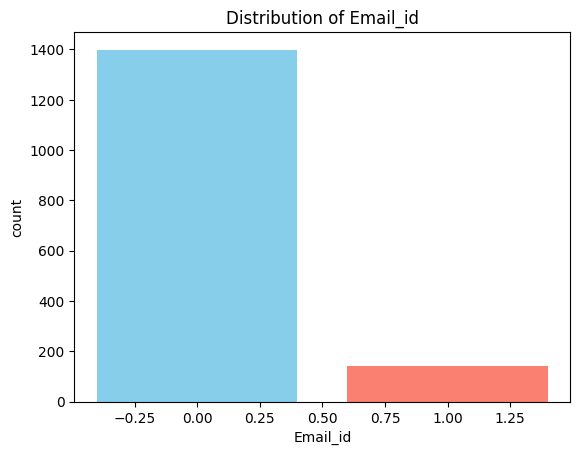

In [ ]:
# count number of Email_id
Email_id_count=df2['Email_id'].value_counts()
plt.bar(Email_id_count.index,Email_id_count.values,color=['skyblue', 'salmon'])
plt.xlabel('Email_id')
plt.ylabel('count')
plt.title('Distribution of Email_id')
plt.show()

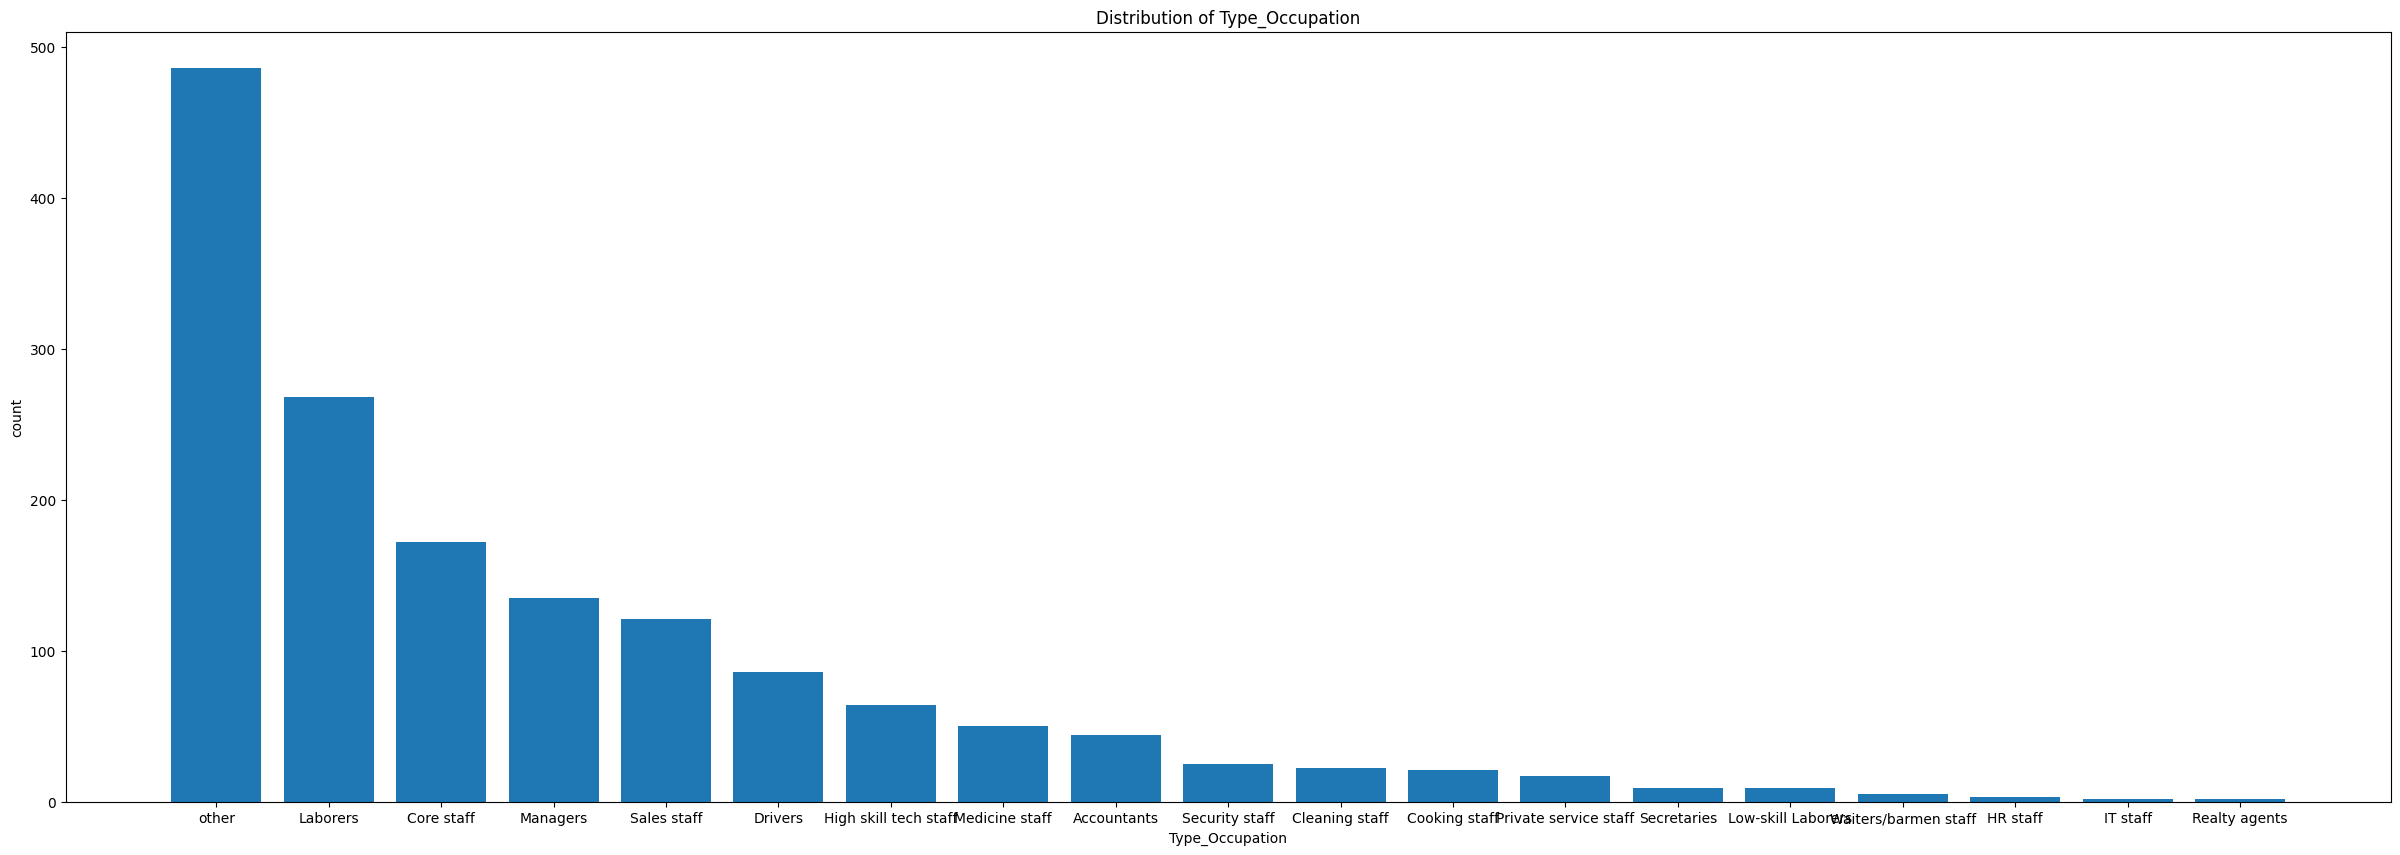

In [ ]:
# count number of Type_Occupation
Type_Occupation_count=df2['Type_Occupation'].value_counts()
plt.figure(figsize=(30,10))
plt.bar(Type_Occupation_count.index,Type_Occupation_count.values)
plt.xlabel('Type_Occupation')
plt.ylabel('count')
plt.title('Distribution of Type_Occupation')
plt.show()

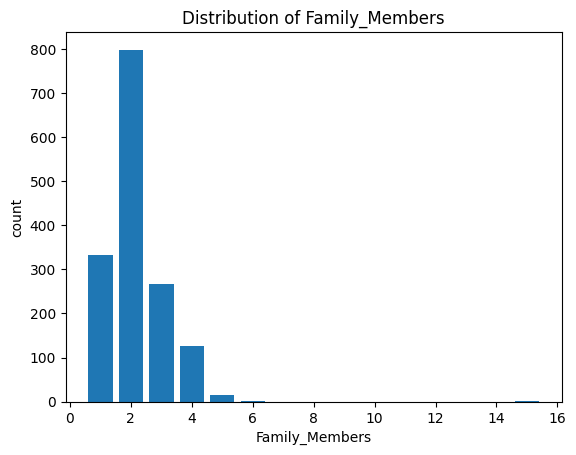

In [ ]:
# count number of Family_Members
Family_Members_count=df2['Family_Members'].value_counts()
plt.bar(Family_Members_count.index,Family_Members_count.values)
plt.xlabel('Family_Members')
plt.ylabel('count')
plt.title('Distribution of Family_Members')
plt.show()

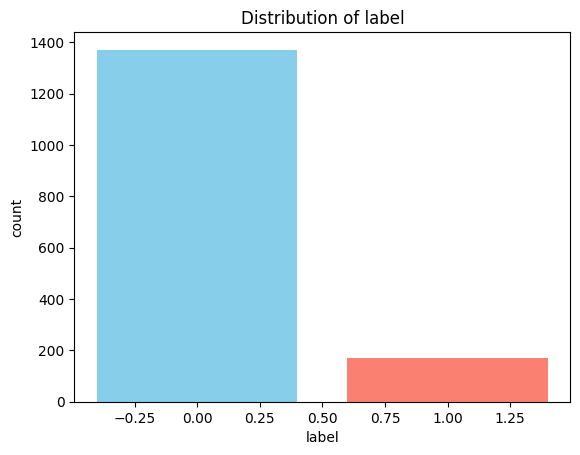

In [ ]:
# count number of label
label_count=df2['label'].value_counts()
plt.bar(label_count.index,label_count.values,color=['skyblue', 'salmon'])
plt.xlabel('label')
plt.ylabel('count')
plt.title('Distribution of label')
plt.show()

Feature selection :- Correlation is a measure of the linear relationship between 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that good variables correlate highly with the target. Furthermore, variables should be correlated with the target but uncorrelated among themselves.This phenomenon is known as multicollinearity.

In [ ]:
# Find out the correlation between variables using spearman rank correlation
df = df2.corr(method='spearman')
df

,Ind_id,Children,Annual_income,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Family_Members,label
Ind_id,1.000000,0.026155,-0.011117,-0.023564,0.025145,NaN,0.088004,0.007702,-0.044812,0.007507,0.016660
Children,0.026155,1.000000,0.064120,-0.336771,0.156326,NaN,0.040402,0.014571,0.055700,0.814514,-0.014037
Annual_income,-0.011117,0.064120,1.000000,-0.106760,0.165777,NaN,-0.069633,-0.020205,0.116949,0.039158,-0.000154
Age,-0.023564,-0.336771,-0.106760,1.000000,-0.195991,NaN,-0.164662,0.036688,-0.161943,-0.276376,0.048210
Employed_exp,0.025145,0.156326,0.165777,-0.195991,1.000000,NaN,0.159235,0.008315,-0.004001,0.182474,-0.100412
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.088004,0.040402,-0.069633,-0.164662,0.159235,NaN,1.000000,0.353164,-0.008726,0.086653,-0.007203
Phone,0.007702,0.014571,-0.020205,0.036688,0.008315,NaN,0.353164,1.000000,0.015692,0.019702,-0.001799
Email_id,-0.044812,0.055700,0.116949,-0.161943,-0.004001,NaN,-0.008726,0.015692,1.000000,0.054068,0.009560
Family_Members,0.007507,0.814514,0.039158,-0.276376,0.182474,NaN,0.086653,0.019702,0.054068,1.000000,-0.025891


<Axes: >

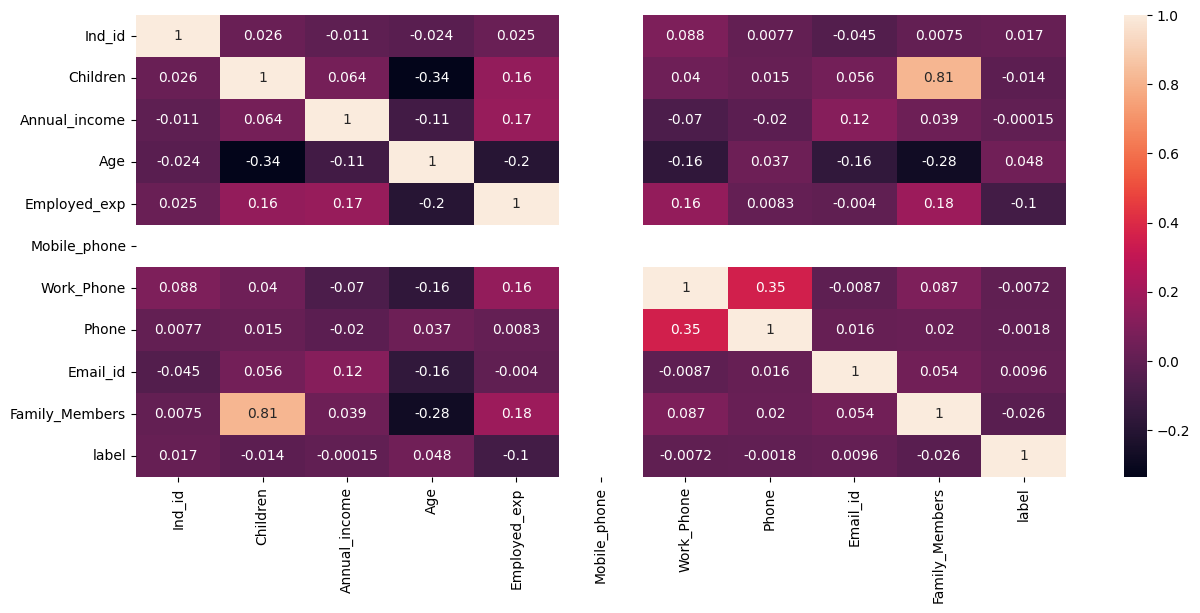

In [ ]:
#Visualization of correlation using Heatmap
plt.figure(figsize=(15,6))
sns.heatmap(df,annot=True)

In [ ]:
corr_matrix = df2.corr()
cor_target = abs(corr_matrix["label"])
relevant_features = cor_target[cor_target>0.01]
relevant_features


Ind_id            0.017351
Children          0.019374
Annual_income     0.017719
Age               0.047550
Employed_exp      0.092561
Family_Members    0.029665
label             1.000000
Name: label, dtype: float64

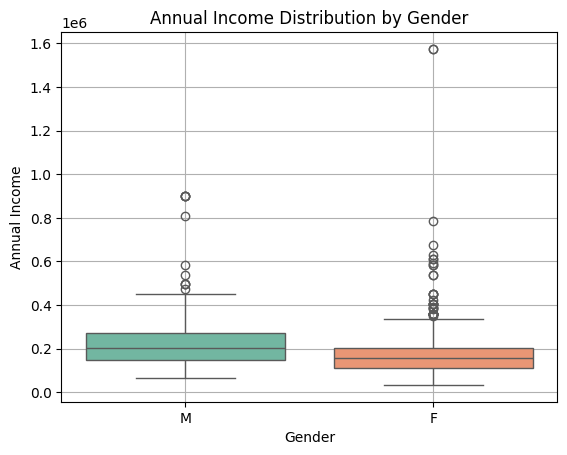

In [ ]:
# Customize the boxplot and set a different color palette
sns.boxplot(x='Gender', y='Annual_income', data=df2, palette='Set2')

# Add title and labels
plt.title('Annual Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income')

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()

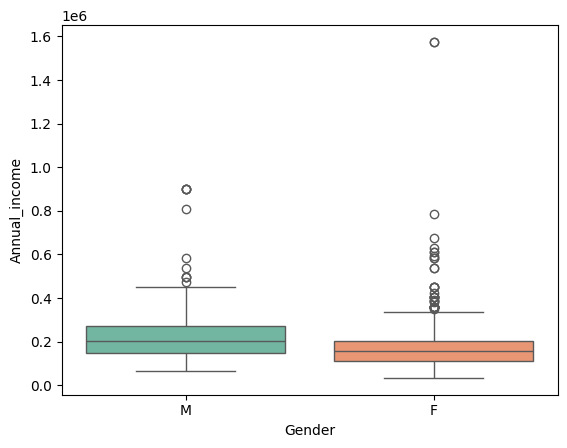

In [ ]:
sns.boxplot(x ='Gender',y ="Annual_income",data=df2,palette='Set2')
plt.show()

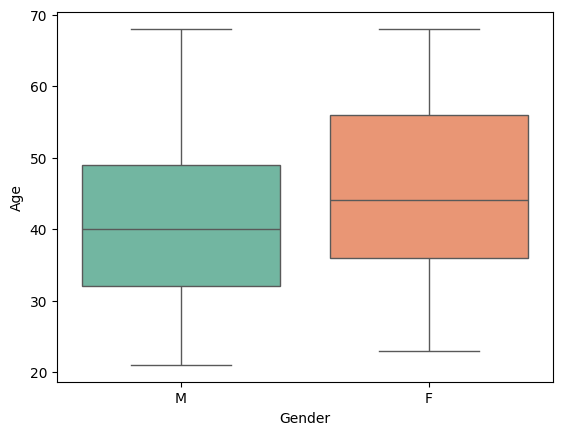

In [ ]:
sns.boxplot(x ='Gender',y ="Age",data=df2,palette='Set2')
plt.show()

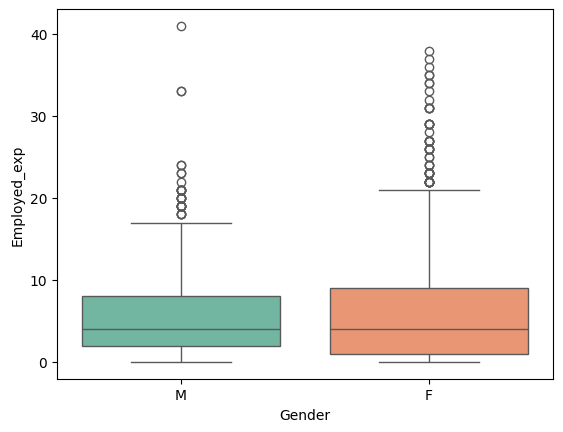

In [ ]:
sns.boxplot(x ='Gender',y ="Employed_exp",data=df2,palette='Set2')
plt.show()

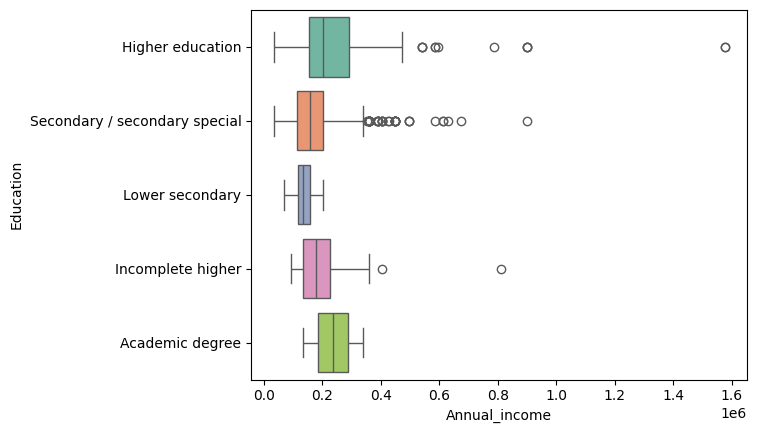

In [ ]:
sns.boxplot(x ='Annual_income',y ="Education",data=df2,palette='Set2')
plt.show()

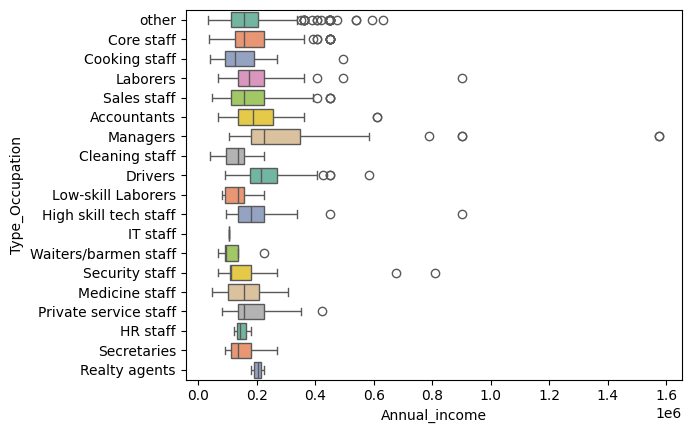

In [ ]:
sns.boxplot(x ='Annual_income',y ="Type_Occupation",data=df2,palette='Set2')
plt.show()

In [ ]:
# removing unused columns
df2 = df2.drop(['Ind_id', 'Mobile_phone','Work_Phone','Phone','Email_id'], axis=1)

In [ ]:
df2.head(5)

,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.0,0.0,other,2,1
1,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,other,2,1
2,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,44.0,2.0,other,2,1
3,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,other,2,1
4,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,other,2,1


Feature engineering: Categorical data encoding is important because many machine learning algorithms require input data to be in numerical format. However, real-world datasets often contain categorical variables, such as gender, occupation, or product type, which cannot be directly used in their original form by these algorithms. Therefore, encoding categorical variables into numerical representations is necessary to effectively utilize them in machine learning models.

In [ ]:
# Ordinal encoding
# we can also use regular expression too
from sklearn.preprocessing import OrdinalEncoder
Or_enc = OrdinalEncoder()
df2[["Education","Marital_status"]] = Or_enc.fit_transform(df2[["Education","Marital_status"]])

In [ ]:
# label encoding for rest categorical variable
from sklearn.preprocessing import LabelEncoder

for col in ["Gender","Car_Owner", "Propert_Owner", "Propert_Owner","Housing_type","Type_Occupation","Type_Income"]:
    df2[col] = LabelEncoder().fit_transform(df2[col])

In [ ]:
df2.head(4)

,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Type_Occupation,Family_Members,label
0,1,1,1,0,180000.00000,1,1.0,1.0,1,51.0,0.0,18,2,1
1,0,1,0,0,315000.00000,0,1.0,1.0,1,37.0,2.0,18,2,1
2,0,1,0,0,315000.00000,0,1.0,1.0,1,44.0,2.0,18,2,1
3,0,1,0,0,191399.32623,0,1.0,1.0,1,37.0,2.0,18,2,1


Let’s visualize the target variable and have a look at how many approved and declined applications are there in our dataset.

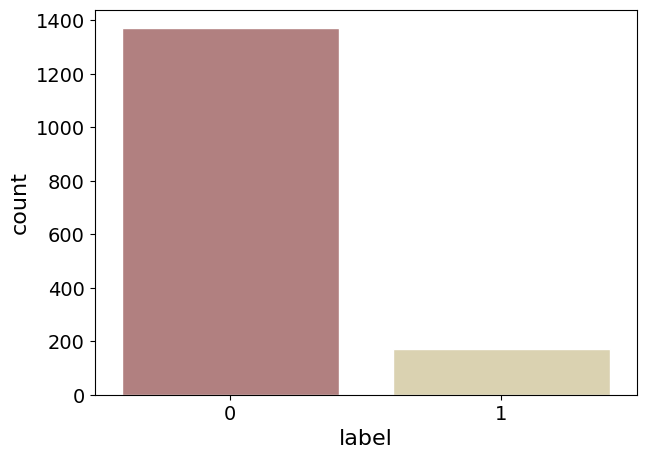

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,5), sharex=True)
sns.countplot(data=df2, x='label',edgecolor="white",palette="pink",order=df2["label"].value_counts().index)
total = df2['label'].value_counts().sum()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('label', fontsize=16)
plt.ylabel('count', fontsize=16)

plt.show()

This tells us that our dataset has more number of disapprovals than approvals

The task of predicting whether a credit card application will be approved or rejected based on values of feature variables is a supervised machine learning classification task. We need to separate the dataset into features and target variables. Following the popular convention, we call the dataframe with feature variables as X and the one with target variable as y. To implement machine learning algorithms we use the popular python library scikit-learn.

In [ ]:

from sklearn.model_selection import train_test_split
# spliting the data
x = df2.iloc[:,0:-1]
y = df2.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=40)

In [ ]:
# count the number rows and columns for x_test
x_test.shape

(463, 13)

In [ ]:
# count the number rows and columns for x_train
x_train.shape

(1078, 13)

In [ ]:
# count the number rows for y_test
y_test.shape

(463,)

In [ ]:
# count the number rows for y_train
y_train.shape

(1078,)

Scaling - We use Robust Scaling when the data is normally distributed and use Normalization when the data is not normally distributed.Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

In [ ]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rescale_x_train = scaler.fit_transform(x_train)
rescale_x_test = scaler.fit_transform(x_test)
print(rescale_x_train.shape)
print(rescale_x_test.shape)

(1078, 13)
(463, 13)


Logistic Regression

In [ ]:
# importing the LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(rescale_x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#Importing scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = logreg.predict(rescale_x_test)
print("logistic_regression training set:",logreg.score(x_train, y_train))
print("logistic_regression testing set:",logreg.score(x_test, y_test))
print("Accuracy_logistic_regression_classifier: ", accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

logistic_regression training set: 0.10946196660482375
logistic_regression testing set: 0.11231101511879049
Accuracy_logistic_regression_classifier:  0.8876889848812095
[[411   0]
 [ 52   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Cross validation

In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model= LogisticRegression()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.89320388 0.91262136 0.89644013 0.90291262 0.87702265 0.88673139
 0.92556634 0.90291262 0.89320388 0.89644013]
0.8987055016181229


Decision Tree

In [ ]:
# decision tree classification  without rescaled
from sklearn.tree import DecisionTreeClassifier
classification = DecisionTreeClassifier()
classification = classification.fit(x_train,y_train)
y_pred = classification.predict(x_test)
print("decision tree training set:",classification.score(x_train, y_train))
print("decision tree testing set:",classification.score(x_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

df2 = DataFrame (list_score,columns=['Depth','Train Accuracy','Test Accuracy'])
plt.plot(df2['Depth'],df2['Test Accuracy'],label='Test Accuracy')
plt.plot(df2['Depth'],df2['Train Accuracy'],label='Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

decision tree training set: 0.9944341372912802
decision tree testing set: 0.8552915766738661
Accuracy: 0.8552915766738661
[[374  37]
 [ 30  22]]


NameError: name 'DataFrame' is not defined

Cross validation

In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model= DecisionTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.90291262 0.84142395 0.8802589  0.85436893 0.84466019 0.86731392
 0.8802589  0.85436893 0.86407767 0.87055016]
0.8660194174757281


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("rf training set:",rf.score(x_train, y_train))
print("rf testing set:",rf.score(x_test, y_test))
print("Random Forest classifier has accuracy of: ", rf.score(x_test, y_test))
# Evaluate the confusion_matrix
print(confusion_matrix(y_test, y_pred))

rf training set: 0.9944341372912802
rf testing set: 0.9200863930885529
Random Forest classifier has accuracy of:  0.9200863930885529
[[408   3]
 [ 34  18]]


Cross validation

In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model=RandomForestClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.91909385 0.93203883 0.90614887 0.90938511 0.92556634 0.92880259
 0.90291262 0.94498382 0.94174757 0.90614887]
0.9216828478964402


XG boost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
xg=XGBClassifier()
xg=xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
print("xg training set:",xg.score(x_train, y_train))
print("xg testing set:",xg.score(x_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

xg training set: 0.9935064935064936
xg testing set: 0.9092872570194385
Accuracy: 0.9092872570194385
[[401  10]
 [ 32  20]]


Cross validation

In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model=XGBClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
result=cross_val_score(model,x,y,cv=ssplit)
print(result)
print(np.mean(result))

[0.92556634 0.91585761 0.90938511 0.91585761 0.89644013 0.93203883
 0.92880259 0.91262136 0.90291262 0.9223301 ]
0.9161812297734627


In [ ]:
data = {
    "Model": ["Logistic Regression", "Decision Tree", "Random forest", "XGBoost"],
    "Accuracy": [0.89, 0.85, 0.92, 0.90]
    }

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

                 Model  Accuracy
0  Logistic Regression      0.89
1        Decision Tree      0.85
2        Random forest      0.92
3              XGBoost      0.90


**Conclusion:-**
The task of predicting whether a credit card application will be approved or rejected based on values of feature variables is a supervised machine learning classification task.There are several classification models that can be used for this task. In this analysis, we will build five different types of classification models namely Logistic Regression, Decision Tree, Randon forest and XGBoost.Above are the predicted accuracy of the models.
RANDOM FOREST MODEL is best for the prediction with accuracy of 92%.

SQL Queries

In [ ]:
df2.head(3)

,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Type_Occupation,Family_Members,label
0,1,1,1,0,180000.0,1,1.0,1.0,1,51.0,0.0,18,2,1
1,0,1,0,0,315000.0,0,1.0,1.0,1,37.0,2.0,18,2,1
2,0,1,0,0,315000.0,0,1.0,1.0,1,44.0,2.0,18,2,1


In [ ]:
#Group the customers based on their income type and find the average of their annual income.
import duckdb

# Connect to DuckDB
conn = duckdb.connect()
conn.register('df',dff)

# Execute SQL query
result = conn.execute("""
    SELECT Type_Income, AVG(Annual_income	) AS average_income
    FROM dff
    GROUP BY Type_Income
""").fetchdf()

print(result)

            Type_Income  average_income
0             Pensioner   155093.624738
1               Working   180375.175583
2         State servant   210130.434783
3  Commercial associate   233676.908269


In [ ]:
#Please list the top five people having the highest income.
result = conn.execute("""
   SELECT *  Annual_income
FROM dff
ORDER BY Annual_income DESC
LIMIT 5;

""").fetchdf().head(5)

print(result)

    Ind_id Gender Car_Owner Propert_Owner  Children  Annual_income  \
0  5143231      F         Y             Y         1      1575000.0   
1  5143235      F         Y             Y         1      1575000.0   
2  5090470      M         N             Y         1       900000.0   
3  5079016      M         Y             Y         2       900000.0   
4  5079017      M         Y             Y         2       900000.0   

            Type_Income                      Education        Marital_status  \
0  Commercial associate               Higher education  Single / not married   
1  Commercial associate               Higher education  Single / not married   
2               Working  Secondary / secondary special               Married   
3  Commercial associate               Higher education               Married   
4  Commercial associate               Higher education               Married   

        Housing_type   Age  Employed_exp  Mobile_phone  Work_Phone  Phone  \
0  House / apartment 

In [ ]:
#What is the highest education level and what is the total count?
result = conn.execute("""
   SELECT Education, COUNT(*) AS Count
FROM dff
GROUP BY Education;

""").fetchdf().head(5)

print(result)

                       Education  Count
0              Incomplete higher     68
1                Academic degree      2
2               Higher education    421
3  Secondary / secondary special   1029
4                Lower secondary     21


In [ ]:




#Between married males and females, who is having more bad credit?

SyntaxError: invalid syntax (<ipython-input-120-a35a19dab02a>, line 2)

In [ ]:
##Find the female owners of cars and property.
result = conn.execute("""
  SELECT *
FROM dff
WHERE Gender = 'F' AND (Car_Owner = 'Y' AND Propert_Owner = 'Y');

""").fetchdf()

print(result)

      Ind_id Gender Car_Owner Propert_Owner  Children  Annual_income  \
0    5018498      F         Y             Y         0    90000.00000   
1    5018501      F         Y             Y         0   191399.32623   
2    5018503      F         Y             Y         0    90000.00000   
3    5024213      F         Y             Y         0   540000.00000   
4    5036660      F         Y             Y         0    76500.00000   
..       ...    ...       ...           ...       ...            ...   
172  5048458      F         Y             Y         1   126000.00000   
173  5023719      F         Y             Y         0   175500.00000   
174  5033520      F         Y             Y         3   180000.00000   
175  5024049      F         Y             Y         1   144000.00000   
176  5053790      F         Y             Y         0   225000.00000   

              Type_Income                      Education Marital_status  \
0                 Working  Secondary / secondary special    

In [ ]:
#Find the male customers who are staying with their families.
result3 = conn.execute("""
    SELECT *
    FROM dff
    WHERE Gender = 'M' AND Housing_type = 'With parents'
""").fetchdf().head(3)
print(result3)

    Ind_id Gender Car_Owner Propert_Owner  Children  Annual_income  \
0  5021303      M         N             N         1       472500.0   
1  5079166      M         Y             N         0       202500.0   
2  5079167      M         Y             N         0       202500.0   

  Type_Income                      Education Marital_status  Housing_type  \
0   Pensioner               Higher education        Married  With parents   
1     Working  Secondary / secondary special        Married  With parents   
2     Working  Secondary / secondary special        Married  With parents   

    Age  Employed_exp  Mobile_phone  Work_Phone  Phone  Email_id  \
0  24.0           3.0             1           0      0         1   
1  38.0           4.0             1           0      0         0   
2  38.0           4.0             1           0      0         0   

  Type_Occupation  Family_Members  label  
0           other               3      1  
1        Laborers               2      1  
2       

In [ ]:
#How many married people are having bad credit?
result5 = conn.execute("""
    SELECT COUNT(*) AS Count
    FROM dff
    WHERE Marital_status = 'Married' AND label = 0
""").fetchdf()
print(result5)

   Count
0    934


In [ ]:
#Between married males and females, who is having more bad credit?
result7 = conn.execute("""
    SELECT Gender, COUNT(*) AS Bad_Credit_Count
    FROM dff
    WHERE Marital_status = 'Married' AND label= 0
    GROUP BY Gender
""").fetchdf()
print(result7)

  Gender  BadCreditCount
0      F             566
1      M             368
